## Rangkuman

Feature yang dipake dari TOR:
- Alkohol
- percentage expenditure
- BMI
- Hepatitis B

Feature tambahan yang dipake berdasarkan Heat Map (revisi kalo ada):
- Diptheria
- Polio
- GDP
- income composition
- Life expectancy
- Schooling
- Income composition of resources (ICOR)

Feature yang ga di drop untuk keperluan lain:
- Country
- Year
- Status

Yang Di drop: (emang ada beberapa yang juga penting atau justru penting semua, tapi kita pilihnya yang paling penting kalo ga terlalu banyak parameternya)
- Measless 
- Adult Mortality
- infant deaths
- under-five deaths
- Total expenditure
- HIV/AIDS
- Population
- thinness 1-19 years
- thinness 5-9 years


## 0 Import libraries & Preprocessing(?)

In [693]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import numpy as np

In [694]:
data = pd.read_csv('Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [695]:
# Cek ada berapa kategori dari setiap fitur, misal ada 193 negara total, dlsb
data.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
BMI                                 608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
HIV/AIDS                            200
GDP                                2490
Population                         2278
thinness 1-19 years                 200
thinness 5-9 years                  207
Income composition of resources     625
Schooling                           173
dtype: int64

## Menentukan kolom yang dipakai berdasarkan heat map

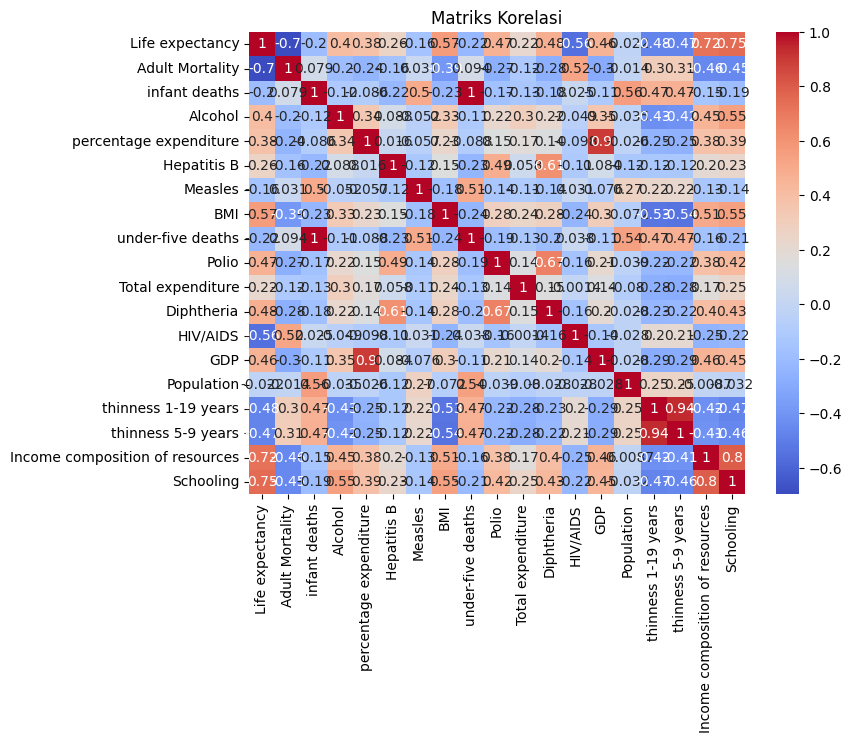

In [696]:
heat_data = data.drop([
    'Country', 
    'Year', 
    'Status'
    ], axis=1)

plt.figure(figsize=(8, 6))
sns.heatmap(heat_data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

Jadi berdasarkan heat map feature tambahan yang dapat dipakai: 
- Diptheria
- Polio
- GDP
- income composition
- Life expectancy
- Schooling
- Income composition of resources (ICOR)

## Cleaning Data

In [697]:
# Drop kolom-kolom yang tidak terpakai
data = data.drop([
    "infant deaths", 
    "under-five deaths", 
    "Total expenditure", 
    "HIV/AIDS",
    "Measles",
    "Population",
    "thinness 1-19 years",
    "thinness 5-9 years",
    "Adult Mortality"
    ], axis=1)

# Ganti nama kolom Income composition of resources menjadi ICOR untuk memudahkan
data.rename(columns = {'Income composition of resources':'ICOR'}, inplace = True)

data.head()


,Country,Year,Status,Life expectancy,Alcohol,percentage expenditure,Hepatitis B,BMI,Polio,Diphtheria,GDP,ICOR,Schooling
0,Afghanistan,2015,Developing,65.0,0.01,71.279624,65.0,19.1,6.0,65.0,584.259210,0.479,10.1
1,Afghanistan,2014,Developing,59.9,0.01,73.523582,62.0,18.6,58.0,62.0,612.696514,0.476,10.0
2,Afghanistan,2013,Developing,59.9,0.01,73.219243,64.0,18.1,62.0,64.0,631.744976,0.470,9.9
3,Afghanistan,2012,Developing,59.5,0.01,78.184215,67.0,17.6,67.0,67.0,669.959000,0.463,9.8
4,Afghanistan,2011,Developing,59.2,0.01,7.097109,68.0,17.2,68.0,68.0,63.537231,0.454,9.5


In [698]:
data.isnull().sum()

Country                     0
Year                        0
Status                      0
Life expectancy            10
Alcohol                   194
percentage expenditure      0
Hepatitis B               553
BMI                        34
Polio                      19
Diphtheria                 19
GDP                       448
ICOR                      167
Schooling                 163
dtype: int64

In [699]:
data = data.dropna(axis=0, how='any')

In [700]:
condition = (data['percentage expenditure'] == 0)
# data[condition]
rows_to_keep = ~condition
data = data[rows_to_keep] 
# dihapus karema 0 ini kemungkinan besar karena tidak diketahui, bukannya beneran 0
# jadi karena gamau buat hasilnya bias mendingan dihapus aja

# 1 Visualisasi life expentancy dengan


## 1.1 Alkohol per kapita

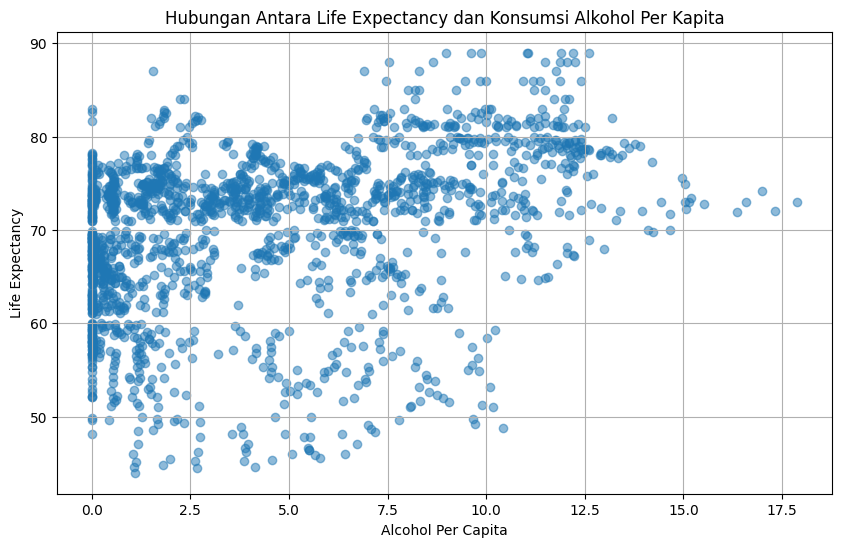

In [701]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Alcohol'], data['Life expectancy'], alpha=0.5)
plt.title('Hubungan Antara Life Expectancy dan Konsumsi Alkohol Per Kapita')
plt.ylabel('Life Expectancy')
plt.xlabel('Alcohol Per Capita')
plt.grid(True)
plt.show()

1. Terdapat korelasi negatif antara life expectancy dengan konsumsi alkohol, semakin tinggi konsumsi alkohol maka angka harapan hidupnya cenderung semakin rendah
2. Bisa dilihat ada kumpulan data dibawah 5 liter konsumsi alkohol per kapita, dengan angka harapan hidup yang cukup tinggi yaitu diatas 70 tahun
3. Sementara diatas konsumsi 10 liter persebarannya mulai beragam 

## 1.2 Percentage Expenditure

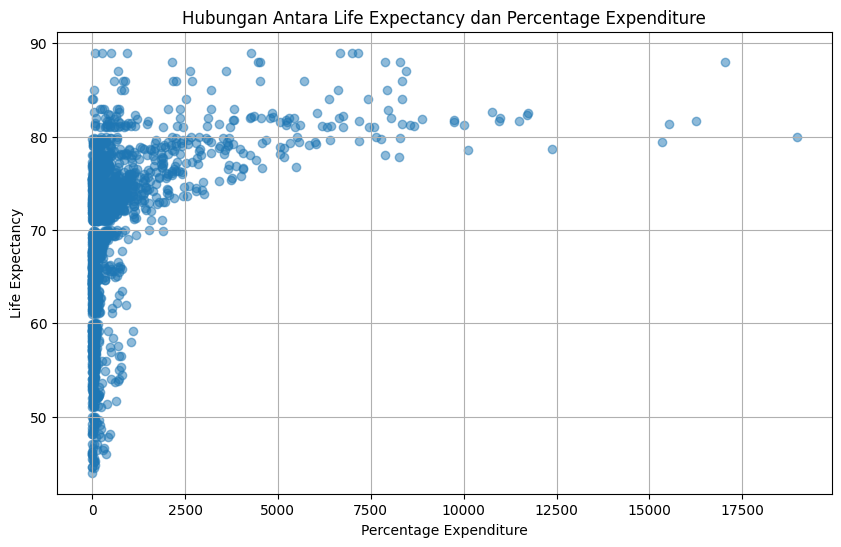

In [702]:
plt.figure(figsize=(10, 6))
plt.scatter(data['percentage expenditure'], data['Life expectancy'], alpha=0.5)
plt.title('Hubungan Antara Life Expectancy dan Percentage Expenditure')
plt.ylabel('Life Expectancy')
plt.xlabel('Percentage Expenditure')
plt.grid(True)
plt.show()

-> Dapat dilihat bahwa kebanyakan data berkumpul dibawah 2500 (satuannya apa?), menandakan bahwa percentage expenditure yang tinggi tidak menjamin life expectancy yang tinggi
-> tapi tidak bisa dipungkiri juga bahwa percentage expenditure diatas 2500 itu tidak ada angka harapan hidup dibawah 70 tahunnya

## 1.3 BMI

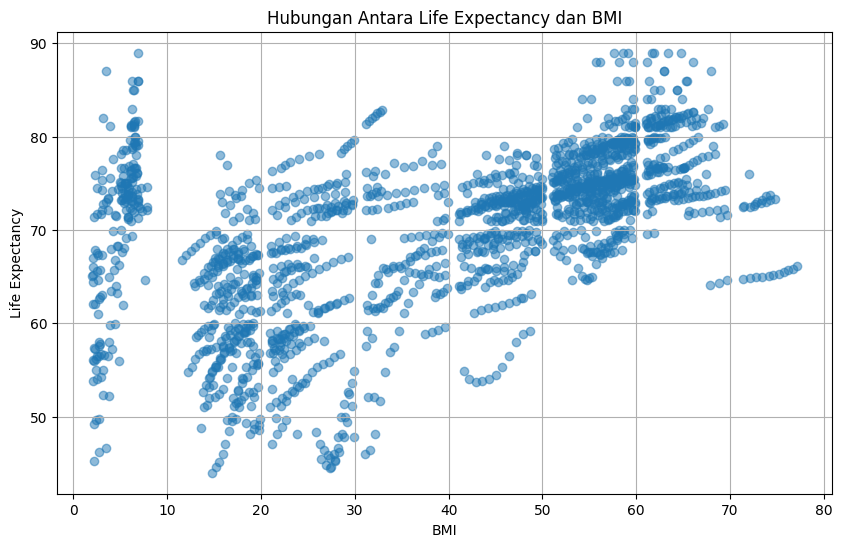

In [703]:
plt.figure(figsize=(10, 6))
plt.scatter(data['BMI'], data['Life expectancy'], alpha=0.5)
plt.title('Hubungan Antara Life Expectancy dan BMI')
plt.ylabel('Life Expectancy')
plt.xlabel('BMI')
plt.grid(True)
plt.show()

1. Terdapat korelasi negatif antara life expectancy dan BMI, di mana semakin tinggi BMI, cenderung semakin rendah life expectancy.  (???)
2. Data terpusat pada rentang BMI 50-60 kg dengan life expectancy 70 - 80 tahun. Artinya mayoritas berapa pada area tersebut
3. BMI ideal ada pada reantang 50 - 70 kg
4. BMI yang underweight (dibawah 30) cenderung memiliki angka harapan hidup yang lebih kecil dibandingkan overweight (60 - 80 kg)

## 1.4 Hepatitis B Percentage

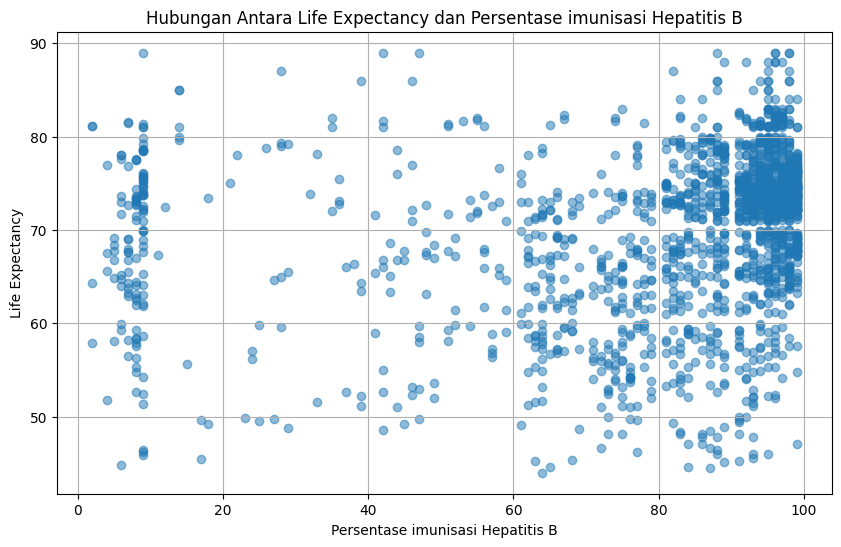

In [704]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Hepatitis B'], data['Life expectancy'], alpha=0.5)
plt.title('Hubungan Antara Life Expectancy dan Persentase imunisasi Hepatitis B')
plt.ylabel('Life Expectancy')
plt.xlabel('Persentase imunisasi Hepatitis B')
plt.grid(True)
plt.show()

1. Mayoritas orang telah divaksinasi, dimana dalam persebaran data persentase 90 - 100% itu paling banyak dan memiliki angka harapan hidup mayoritas di angka 70 - 80 tahun
2. Banyak sekali outliers pada persebaran ini, hal ini disebabkan tingkat korelasi antara imunisasi Hepatitis B dengan angka harapan hidup kurang signifikan (sesuai dengan heat map nya)

## Visualisasi tambahan untuk Schooling dan ICOR karena memiliki korelasi yang paling tinggi dengan Angka Harapan Hidup

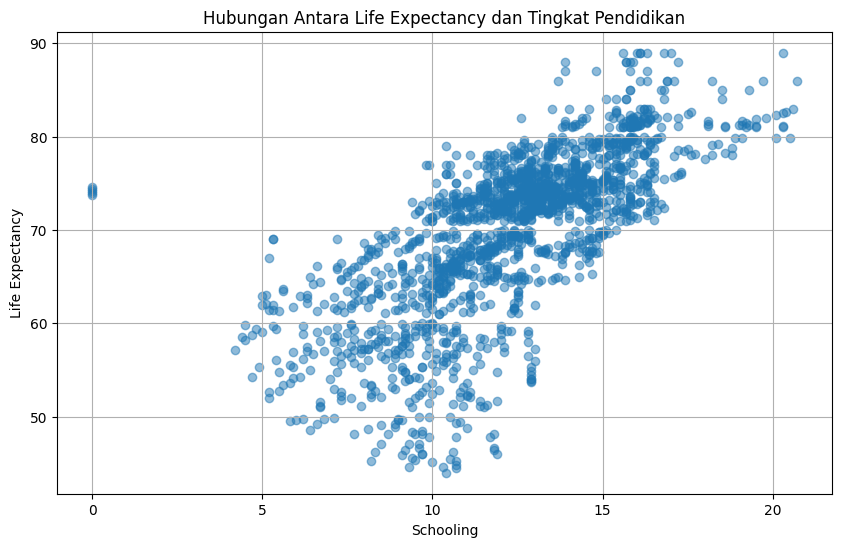

In [705]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Schooling'], data['Life expectancy'], alpha=0.5)
plt.title('Hubungan Antara Life Expectancy dan Tingkat Pendidikan')
plt.ylabel('Life Expectancy')
plt.xlabel('Schooling')
plt.grid(True)
plt.show()

1. Mayoritas tingkat pendidikan dataset ini berada di angka 10 - 15 (satuannya apa?) dengan angka harapan hidup 70 - 80 tahun
2. Korelasi dari tingkat pendidikan dan angka harapan hidup juga berkorelasi positif dimana semakin tinggi tingkat pendidikan seseorang maka angka harapan hidupnya juga akan cenderung meningkat (realistis)

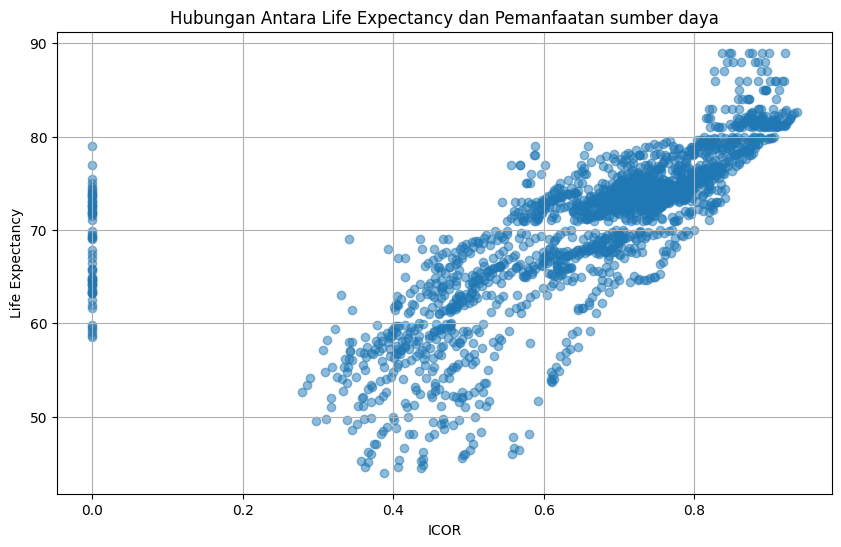

In [706]:
plt.figure(figsize=(10, 6))
plt.scatter(data['ICOR'], data['Life expectancy'], alpha=0.5)
plt.title('Hubungan Antara Life Expectancy dan Pemanfaatan sumber daya')
plt.ylabel('Life Expectancy')
plt.xlabel('ICOR')
plt.grid(True)
plt.show()

1. Mayoritas data berada di rentang ICOR 0.6 - 0.8 dengan angka harapan hidup 70 - 80 tahun
2. Korelasi dari ICOR dan angka harapan hidup juga cenderung positif, dimana semakin tinggi ICOR (semakin mendekati 1) maka angka harapan hidupnya juga semakin tinggi, artinya semakin baik suatu negara dalam memanfaatkan sumber daya, maka angka harapan hidup penduduknya juga akan semakin tinggi

## -> Kesimpulan paling relevan emang schooling sama ICOR sih logis juga berdasarkan data, karena 2 2 nya itu berkorelasi positif.

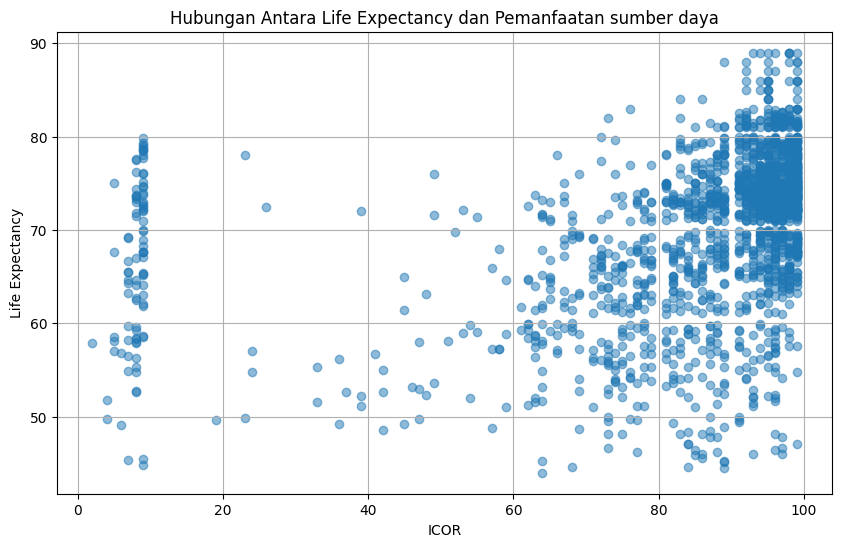

In [707]:
# Buat liat doang belom tentu dipake, diphteria itu penyakit yang paling berhubungan dengan angka harapan hidup
plt.figure(figsize=(10, 6))
plt.scatter(data['Diphtheria'], data['Life expectancy'], alpha=0.5)
plt.title('Hubungan Antara Life Expectancy dan Pemanfaatan sumber daya')
plt.ylabel('Life Expectancy')
plt.xlabel('ICOR')
plt.grid(True)
plt.show()

# 2 Regresi untuk mencari hubungan antara, bilamana relevan

--> Alcohol, dll itu ga relevan jadi R2 nya kecil, mending pake yang relevan dulu aja

## 2.1 Tingkat Pendidikan - Schooling (Paling relevan)

In [708]:
# Ganti x nya jadi feature yang dipake
x = data['Schooling']
y = data['Life expectancy']

In [709]:
# Transformasi Data jika perlu

# Exponential Function, biasanya ga berubah?
# y = np.log(y)

# Power Function
# x = np.log10(x)
# y = np.log10(y)

# Reciprocal Function
# x = 1/x

# Hyperbolic Function
# x = 1/x
# y = 1/y 


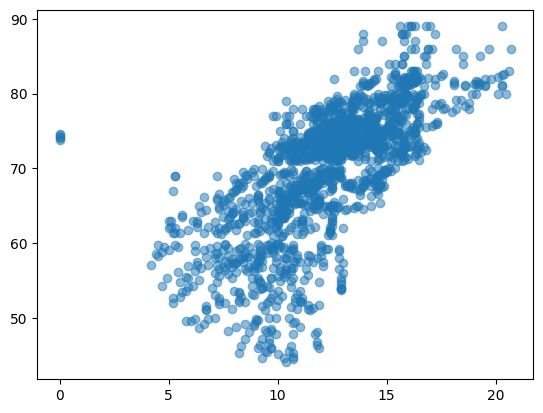

In [710]:
plt.scatter(x, y, alpha=0.5)
# plt.xlabel("Advertising Cost")
# plt.ylabel("Sales")
# plt.title("Relationship between Advertisement & Sales")
plt.show()

In [711]:
# hitung semua nilai rata-rata dan simpangan
n = len(x)

x_bar = np.sum(x) / n
y_bar = np.sum(y) / n
Sxx = np.sum((x - x_bar)**2)
Sxy = np.sum((x - x_bar) * (y - y_bar))
Syy = np.sum((y - y_bar)**2)

print(f"Rataan x \t: {x_bar: .3f}")
print(f"Rataan y \t: {y_bar: .3f}")
print(f"Simpangan xx \t: {Sxx: .3f}")
print(f"Simpangan xy \t: {Sxy: .3f}")
print(f"Simpangan yy \t: {Syy: .3f}")

Rataan x 	:  12.323
Rataan y 	:  70.101
Simpangan xx 	:  15076.703
Simpangan xy 	:  31871.407
Simpangan yy 	:  134218.127


In [712]:
# hitung nilai b0 dan b1
b1 = Sxy / Sxx
b0 = y_bar - b1*x_bar

print(f"Nilai b0 \t: {b0: .3f}")
print(f"Nilai b1 \t: {b1: .3f}")

Nilai b0 	:  44.051
Nilai b1 	:  2.114


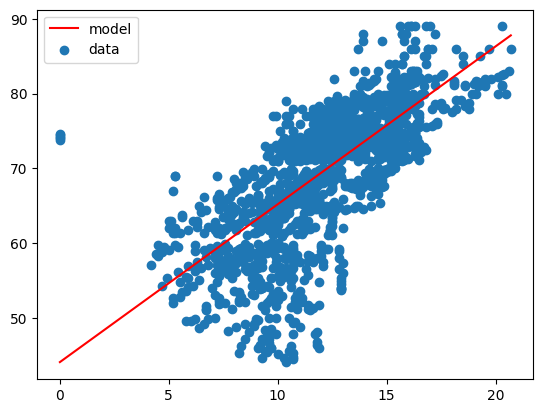

In [713]:
# gambar model dalam bentuk persamaan garis

# x_line membangkitkan titik-titik diskrit di antara rentang data di list x
x_line = np.linspace(np.min(x), np.max(x), 100)
# y_line menunjukkan nilai y dari persamaan linear y = b0 + b1 * x
y_line = b0 + b1 * x_line

# plot garis
plt.plot(x_line, y_line, label = "model", c = "red")

# plot data
plt.scatter(x, y, label = "data")

# plt.xlabel("Advertising Cost")
# plt.ylabel("Sales")
# plt.title("Relationship between Advertisement & Sales")
plt.legend()
plt.show()

In [714]:
# Hitung kuantitas-kuantitas awal yang diperlukan

# y_hat = b0 + b1 * x
def y_hat(x):
  global b0, b1
  return b0 + b1 * x

SSE = np.sum((y_hat(x) - y)**2)
SSR = np.sum((y_hat(x) - y_bar)**2)
SST = np.sum((y - y_bar)**2)

print(f"SSE \t: {SSE: .3f}")
print(f"SSR \t: {SSR: .3f}")
print(f"SST \t: {SST: .3f}")

SSE 	:  66843.546
SSR 	:  67374.581
SST 	:  134218.127


In [715]:
# Hitung metrik evaluasi model regresi linear

rho = Sxy/np.sqrt(Sxx*Syy)
R_square = 1 - SSE/SST
MSE = 1/(n-2) * SSE
RMSE = np.sqrt(MSE)

print(f"rho \t: {rho: .3f}")
print(f"^ Korelasi positif")
print(f"R2 \t: {R_square: .3f}")
print(f"^ Yang paling relevan aja cuma 0.5 jir R2 nya")
print(f"MSE \t: {MSE: .3f}")
print(f"RMSE \t: {RMSE: .3f}")

rho 	:  0.709
^ Korelasi positif
R2 	:  0.502
^ Yang paling relevan aja cuma 0.5 jir R2 nya
MSE 	:  36.210
RMSE 	:  6.017


In [716]:
# inputkan nilai regressor yang ingin diprediksi responnya.
x_predict = 20

# hitung prediksi respon
y_predict = b0 + b1*x_predict

print(f"x_predict \t: {x_predict: .3f}")
print(f"y_predict \t: {y_predict: .3f}")

x_predict 	:  20.000
y_predict 	:  86.330


In [717]:
from scipy.stats import norm

alpha = 0.05

# tentukan nilai sigma_alpha sehingga P(-sigma_alpha < epsilon < sigma_alpha) = 1 - alpha
# sigma_alpha = 2*alpha # ?? kalo di ppt gini? wkwkw
sigma_alpha = norm.ppf(1 - alpha/2) * RMSE # tapi yang bener ini aowoak

# tentukan batas bawah dan atas interval hasil prediksi
y_pred_low = y_predict - sigma_alpha
y_pred_up = y_predict + sigma_alpha

print(f"x_predict \t: {x_predict: .3f}")
print(f"\nWith confidence level {1-alpha:.2%},")
print(f"y_predict \t: {y_pred_low: .3f} - {y_pred_up: .3f}")

x_predict 	:  20.000

With confidence level 95.00%,
y_predict 	:  74.536 -  98.124


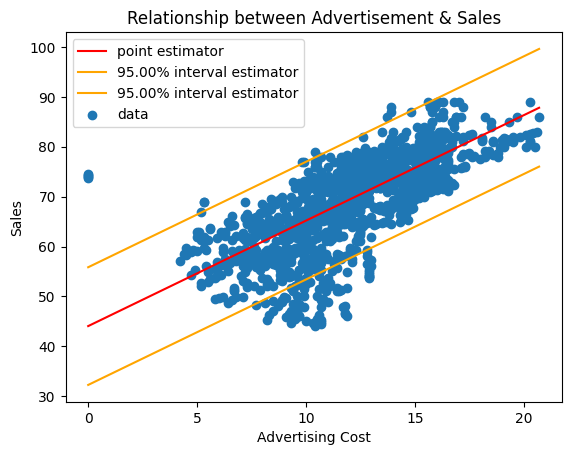

In [718]:
# gambar batas interval dalam bentuk persamaan garis

# x_line membangkitkan titik-titik diskrit di antara rentang data di list x
x_line = np.linspace(np.min(x), np.max(x), 100)

# prediksi titik
y_line = b0 + b1 * x_line

# prediksi interval
y_low = y_line - sigma_alpha
y_up = y_line + sigma_alpha


# plot prediksi titik
plt.plot(x_line, y_line, label = "point estimator", c = "red")

# plot prediksi interval
plt.plot(x_line, y_low, label = f"{1-alpha:.2%} interval estimator", c = "orange")
plt.plot(x_line, y_up, label = f"{1-alpha:.2%} interval estimator", c = "orange")


# plot data
plt.scatter(x, y, label = "data")

plt.xlabel("Advertising Cost")
plt.ylabel("Sales")
plt.title("Relationship between Advertisement & Sales")
plt.legend()
plt.show()

## 2.2 Percentage Expenditure

## 2.3 BMI

## 2.4 Hepatitis B Percentage

# 3 Inferensi statistika u/ intv kepcy koef hasil reg

# 4 Visualisasi data relevan